In [1]:
import torch
import torchtrail

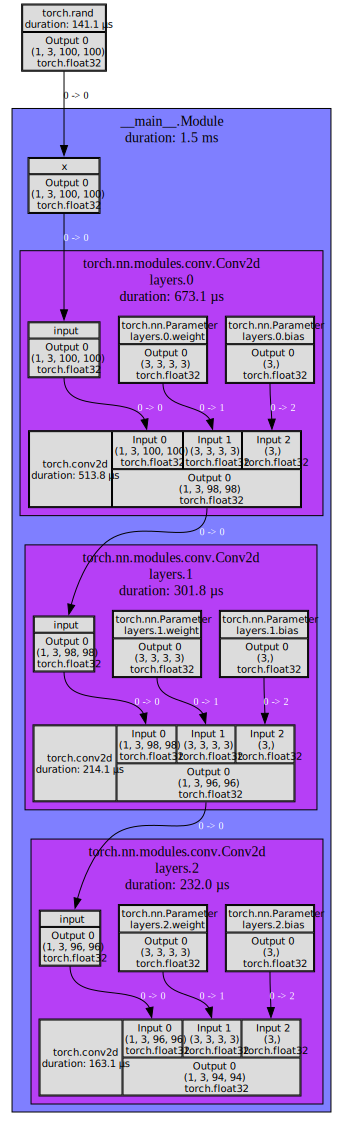

In [2]:
class Module(torch.nn.Module):

    def __init__(self):
        super(Module, self).__init__()
        self.layers = torch.nn.ModuleList([torch.nn.Conv2d(3, 3, 3) for _ in range(3)])

    def forward(self, x):
        for module in self.layers:
            x = module(x)
        return x


module = Module()

with torchtrail.trace():
    output = module(torch.rand(1, 3, 100, 100))

torchtrail.visualize(output)

In [3]:
print(torchtrail.codegen(output))

def Conv2d_layers_0(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (3, 3, 3, 3), dtypes: torch.float32
    variable_1 = parameters.bias    # shapes: (3,), dtypes: torch.float32
    variable_2 = torch.conv2d(input, variable_0, variable_1, [1, 1], [0, 0], [1, 1], 1)    # shapes: (1, 3, 98, 98), dtypes: torch.float32; duration: 513.8 µs
    return variable_2

def Conv2d_layers_1(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (3, 3, 3, 3), dtypes: torch.float32
    variable_1 = parameters.bias    # shapes: (3,), dtypes: torch.float32
    variable_2 = torch.conv2d(input, variable_0, variable_1, [1, 1], [0, 0], [1, 1], 1)    # shapes: (1, 3, 96, 96), dtypes: torch.float32; duration: 214.1 µs
    return variable_2

def Conv2d_layers_2(config, input, *, parameters):
    variable_0 = parameters.weight    # shapes: (3, 3, 3, 3), dtypes: torch.float32
    variable_1 = parameters.bias    # shapes: (3,), dtypes: torch.float32
    varia